# New Apprentice Python Project
**Using the appleAppData data set found on Kaggle!**

```python
Business Questions :
1. What is the average rating of the FREE and NON-FREE apps
2. What are the average ratings of common genres (gaming, business, navigation, etc)?
3. What is the average price of gaming apps?
```

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


## Opening the data and creating a variable that reads the data and then a variable to put the data into a list
with open('appleAppData.csv', 'r', encoding = 'utf8') as read_obj:
    csv_reader = csv.reader(read_obj) # Reading the data set
    apps_data = list(csv_reader) # Put the data set into a list


In [12]:


df = pd.read_csv('appleAppData.csv')
column_headers = list(df.columns.values)
print("The Column Header :", column_headers)


## Displays information on a specific column name
category = df['Primary_Genre'].unique().tolist()
print(category)
df.info()

The Column Header : ['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating', 'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version', 'Price', 'Currency', 'Free', 'DeveloperId', 'Developer', 'Developer_Url', 'Developer_Website', 'Average_User_Rating', 'Reviews', 'Current_Version_Score', 'Current_Version_Reviews']
['Education', 'Book', 'Reference', 'News', 'Lifestyle', 'Health & Fitness', 'Games', 'Medical', 'Food & Drink', 'Sports', 'Shopping', 'Entertainment', 'Utilities', 'Stickers', 'Productivity', 'Music', 'Photo & Video', 'Travel', 'Business', 'Social Networking', 'Magazines & Newspapers', 'Navigation', 'Finance', 'Weather', 'Graphics & Design', 'Developer Tools']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   App_Id                   1230376 non-null  object 
 1   App_


# **Finding the average rating of free apps and non free apps!**


[Text(0, 0, '4.0592'), Text(0, 0, '3.7311')]

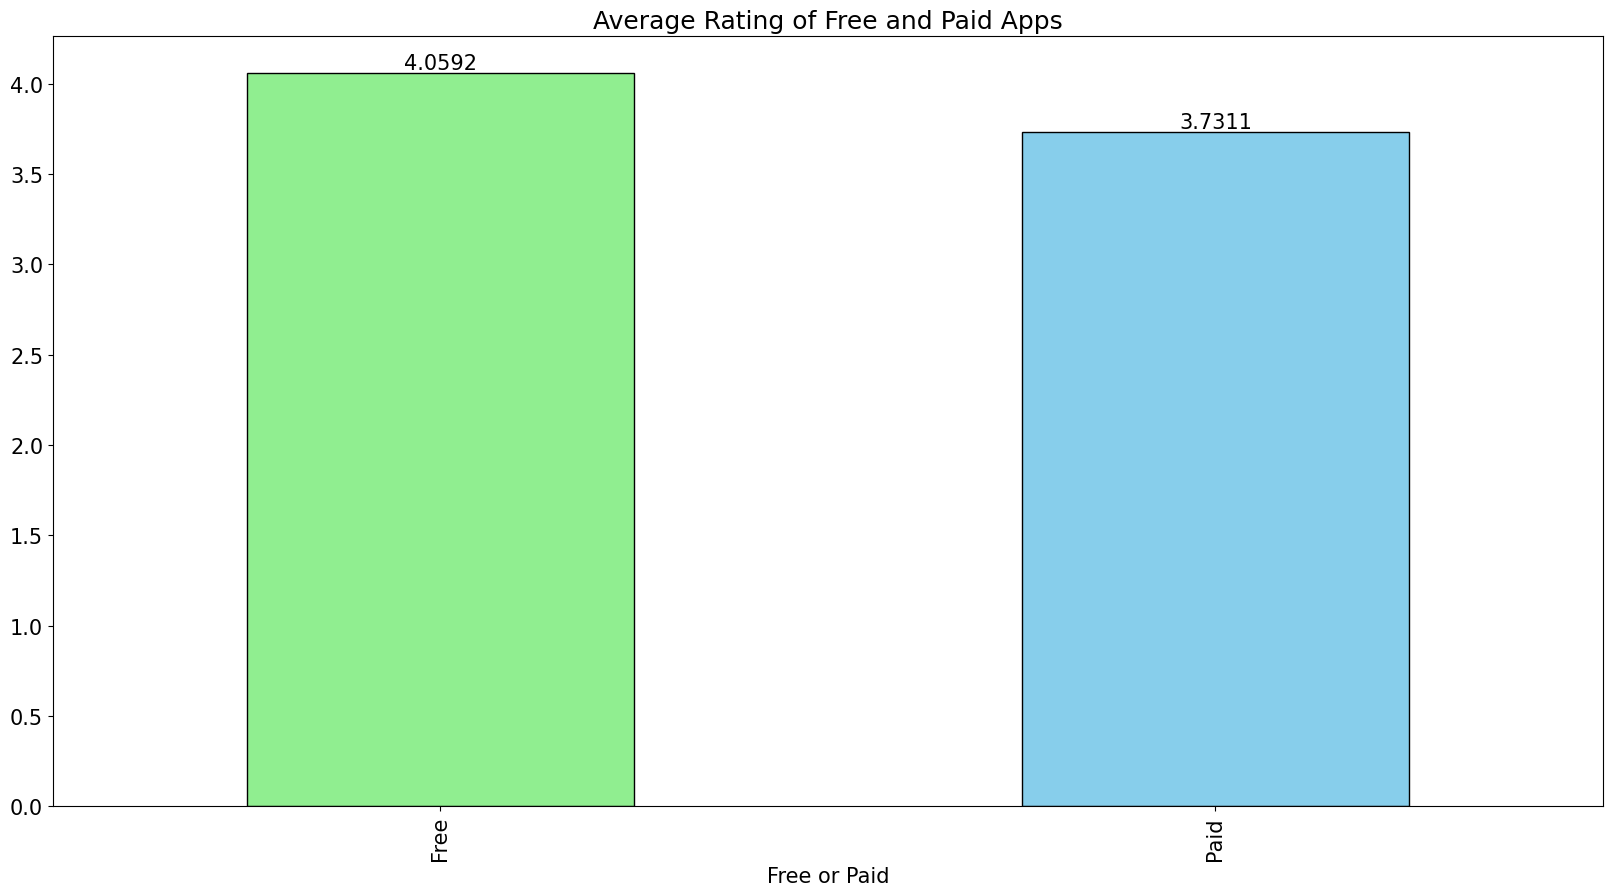

In [30]:

# Create a function that loops through the rating column to assign those values to lists
def loop_paid_vs_free():
    global non_free_ratings, free_apps_ratings
    non_free_ratings = []
    free_apps_ratings = []
    for row in apps_data[1:]:
        free_or_paid = row[12]
        if row[17] > '0.0': ## Checks if the rating is more than 0, to remove non rated apps
            rating = float(row[17])
            free_or_paid = row[12]
            if free_or_paid == 'True':
                free_apps_ratings.append(rating)
            else:
                non_free_ratings.append(rating)
                
## Create a function to find the average of ratings and return that value
def average_for_lists(sum_list, len_list):
    average = round(sum_list / len_list, 4)
    return average


loop_paid_vs_free() ##Calling my loop function to find the ratings from free and paid apps

# Print the findings
##print('Average Rating of Free Apps: ' + str(average_rating(sum(free_apps_ratings), len(free_apps_ratings))))
##print('Average Rating of Paid Apps: ' + str(average_rating(sum(non_free_ratings), len(non_free_ratings))))

free_paid_graph_dict = {'Free or Paid': ['Free', 'Paid'],
                    'Average Rating':[average_for_lists(sum(free_apps_ratings), len(free_apps_ratings)), average_for_lists(sum(non_free_ratings), len(non_free_ratings))]}

free_paid_df = pd.DataFrame(free_paid_graph_dict)

## Graphing the dataframe
matplotlib.style.use('default')
matplotlib.rcParams['font.size'] = 15
free_paid_graph = free_paid_df.plot(figsize = (20, 10),
            color = ['lightgreen', 'skyblue'],
            kind = 'bar',
            legend = False,
            x = 'Free or Paid',
            y = 'Average Rating',
            title = 'Average Rating of Free and Paid Apps',
            edgecolor = 'black')
free_paid_graph.bar_label(free_paid_graph.containers[0]) #shows the value of the bars

# **Average Ratings of Common Genres**

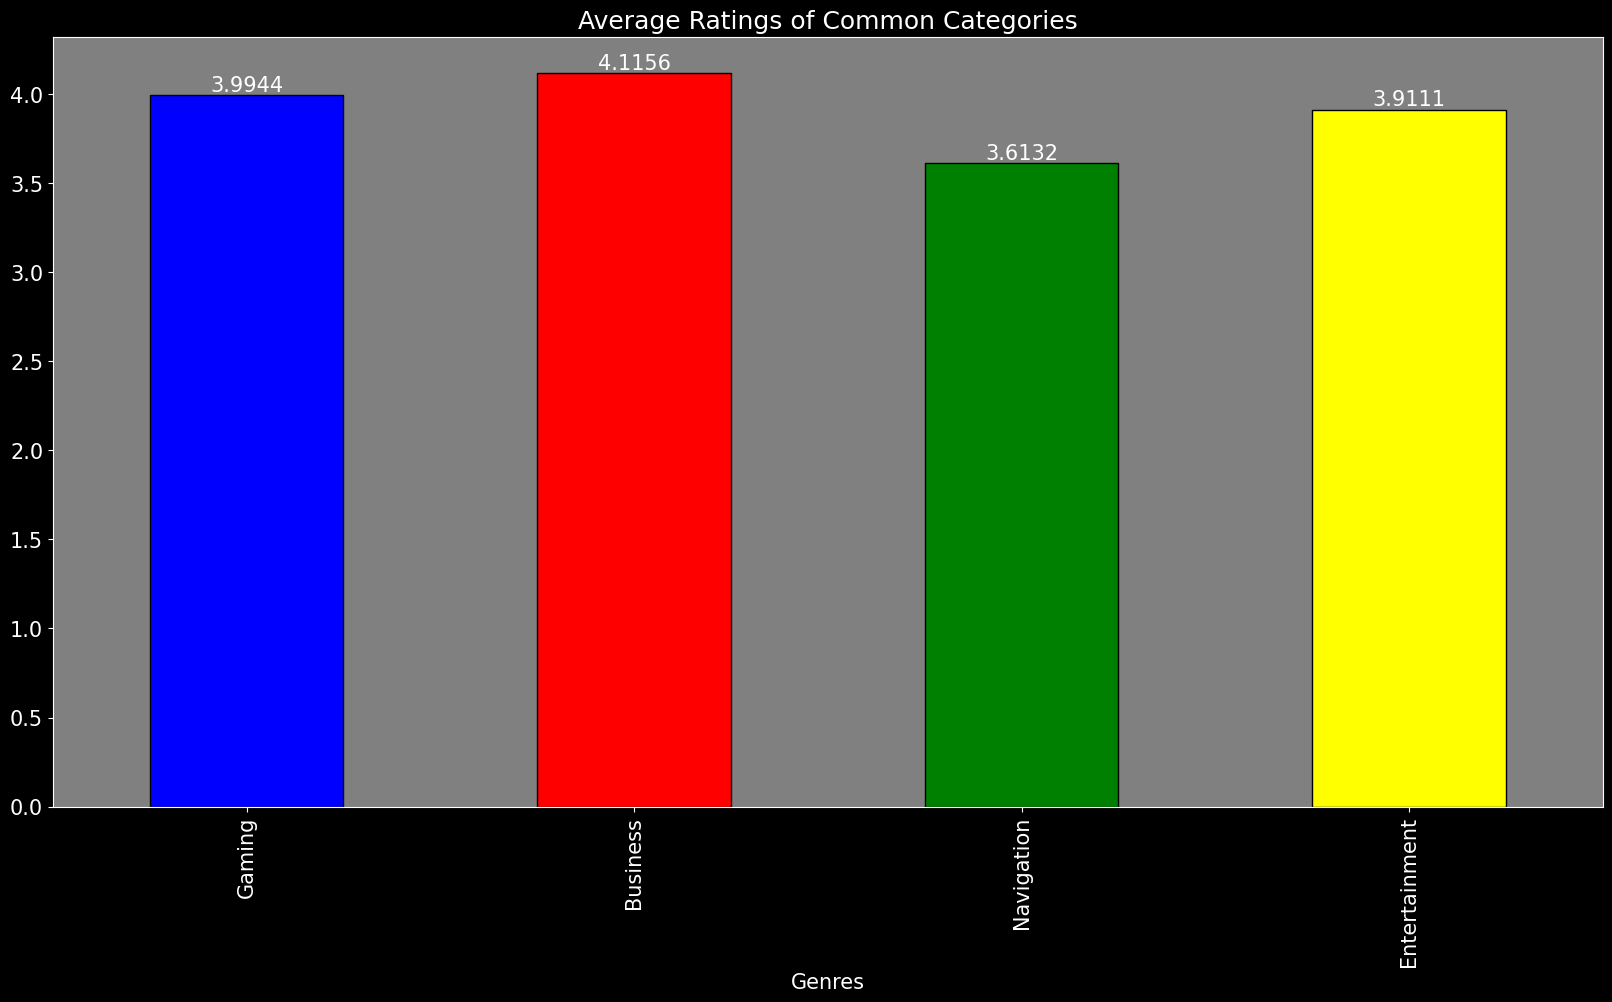

In [23]:

# Creating list variables to hold iterated data
games_genre_rating = []
business_genre_rating = []
navigation_genre_rating = []
entertainment_genre_rating = []

for row in apps_data[1:]:
    rating = float(row[17])
    genre = row[3]

    if genre == 'Games' and row[17] > '0.0':
        games_genre_rating.append(rating)
    elif genre == 'Business' and row[17] > '0.0':
        business_genre_rating.append(rating)
    elif genre == 'Navigation' and row[17] > '0.0':
        navigation_genre_rating.append(rating)
    elif genre == 'Entertainment' and row[17] > '0.0':
        entertainment_genre_rating.append(rating)

## Creating a graph dictionary to hold the data that I want to display
graph_dict = { 'Genres':['Gaming', 'Business', 'Navigation', 'Entertainment'],
                'Average Rankings':[average_for_lists(sum(games_genre_rating), len(games_genre_rating)), average_for_lists(sum(business_genre_rating), len(business_genre_rating)), average_for_lists(sum(navigation_genre_rating), len(navigation_genre_rating)), average_for_lists(sum(entertainment_genre_rating), len(entertainment_genre_rating))]}

## Creating the DataFrame using the dictionary I created
df = pd.DataFrame(graph_dict)
matplotlib.style.use('dark_background')
matplotlib.rcParams['font.size'] = 15
## Creates a bar graph using the information from the DataFrame
graph = df.plot(figsize = (20, 10), 
            kind = 'bar',
            title = 'Average Ratings of Common Categories',
            legend = False,
            x = 'Genres',
            y = 'Average Rankings',
            color = ['blue', 'red', 'green', 'yellow'],
            edgecolor = 'black')
graph.bar_label(graph.containers[0]) #Graph labels to display the actual average of the genre
graph.set_facecolor('gray')

# Calculating the average price of gaming apps

In [ ]:
price_gaming_apps = []

for row in apps_data[1:]:
    genre = row[3]
    try:
        if float(row[10]) > 0 and genre == 'Games':
            price_gaming_apps.append(float(row[10].strip('"')))
    except ValueError:
        pass
avg_paid_apps = round(sum(price_gaming_apps) / len(price_gaming_apps), 2)
most_expensive_game_app = max(price_gaming_apps)
cheapest_game_app = min(price_gaming_apps)
print("The average price of gaming apps is: " + "$" + str(avg_paid_apps))
print("The most expensive gaming app is: " + "$" + str(most_expensive_game_app))
print("The cheapest gaming app is: " + "$" + str(cheapest_game_app))


## Maybe make a graph showing the max, min and avg price